In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Conc_data=pd.read_csv('Concrete_Data.csv')
Conc_data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
Conc_data.shape

(1030, 9)

In [4]:
Conc_data.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [5]:
Conc_data.csMPa.value_counts()

33.40    6
77.30    4
79.30    4
31.35    4
71.30    4
        ..
47.40    1
51.96    1
56.74    1
17.57    1
32.77    1
Name: csMPa, Length: 845, dtype: int64

In [6]:
Conc_data.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x=Conc_data.drop('csMPa',axis=1)
y=Conc_data['csMPa']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train,y_train)

Lasso(alpha=0.1)

### Evaluation by Score method

In [10]:
reg.score(x_test,y_test)

0.6128936724346628

### Evaluation by Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(reg,x,y,cv=5)
cross_val_score

array([0.33349165, 0.41130792, 0.45124798, 0.60680093, 0.50463913])

In [12]:
np.mean(cross_val_score)

0.4614975210525218

In [13]:
y_pred=reg.predict(x_test)

In [14]:
reg.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
params = {'alpha': [0.001,0.1,1,100],
         'tol':[0.01,0.1,100,1000],
         'warm_start':[True],
         'selection':['random']}
lasso=Lasso()
lasso_model = GridSearchCV(lasso, params, cv = 5)
lasso_model.fit(x_train, y_train)
best_lasso_model = lasso_model.best_estimator_
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.1, 'selection': 'random', 'tol': 0.1, 'warm_start': True}
0.6041418227134019


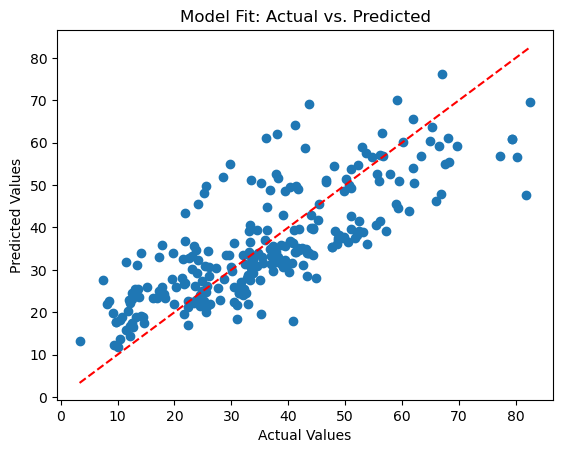

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_true' is the actual target values, and 'y_pred' is the predicted values.
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model Fit: Actual vs. Predicted")
plt.show()


## Using Ridge regression model

In [17]:
from sklearn import linear_model
lr_model = linear_model.Ridge(alpha=.5)
lr_model.fit(x_train,y_train)

Ridge(alpha=0.5)

### Evaluating the model using the score method

In [18]:
lr_model.score(x_test,y_test)

0.6129553162941959

### Evaluating the model using the cross validation method

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score2=cross_val_score(lr_model,x,y,cv=5)
cross_val_score2

array([0.3301647 , 0.41207015, 0.4517547 , 0.6072496 , 0.50374536])

In [20]:
lr_model.get_params()

{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [30]:
np.random.seed(42)
# Lets shuffle the data
Conc_data_shuffled=Conc_data.sample(frac=1)
#Splitting
x_s=Conc_data_shuffled.drop('csMPa',axis=1)
y_s=Conc_data_shuffled['csMPa']


In [42]:
x_s.shape,y_s.shape

((1030, 8), (1030,))

In [47]:
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(x_s,y_s,test_size=0.15,random_state=0)

In [48]:
model_s=linear_model.Ridge()

In [49]:
x_train_s.shape,y_train_s.shape

((875, 8), (875,))

In [51]:
model_s.fit(x_train_s,y_train_s)
model_s.score(x_test_s,y_test_s)

0.6564448461313568

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
params = {'alpha': [0.001,0.01,10,100],
         'tol':[0.01,1,20,1000],
         }
lr_model2=model_s
ridge_model = GridSearchCV(lr_model2, params, cv = 5)
ridge_model.fit(x_train_s, y_train_s)
best_ridge_model = ridge_model.best_estimator_
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 100, 'tol': 0.01}
0.5909451319582534
